In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score  
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_parquet(r"C:\Users\ISAIAS_QUINTERO\Desktop\Trabajo Practica\datos_vectorizados.parquet")
df.head()

,Sexos,Grupos,abajo,abajome,abajoperdi,abandon,abandonadayo,abandonado,abandonadoexprés,abandonadotrato,...,zoplicona,zoraido,zoster,zozobra,zuly,zumbido,zñiga,ás,él,és
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07274,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 19862 entries, Sexos to és
dtypes: float64(19860), int32(2)
memory usage: 757.6 MB


In [7]:
X = df.drop(columns=['Grupos'])
Y = df['Grupos']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 19861), (1500, 19861), (3500,), (1500,))

In [13]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))    
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6433333333333333
Precision: 0.6816556529798176
Recall: 0.5589745450665602
F1 Score: 0.5952996637672854
Confusion Matrix:
 [[192  23   4  16   6  84]
 [ 18 220   1   4  11 122]
 [ 16   9  51  13   1  28]
 [ 22  12   0  80   0  36]
 [  7   5   2   1  26  35]
 [ 33  18   3   4   1 396]]


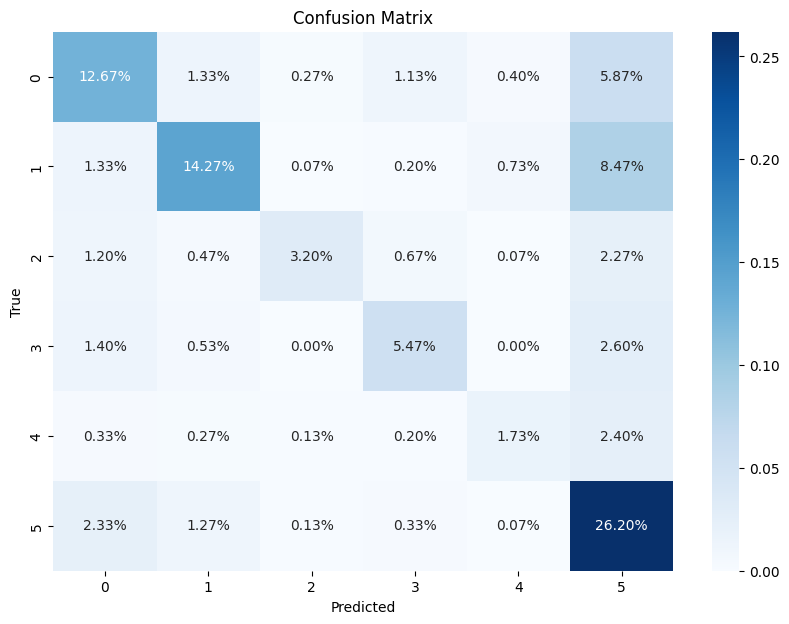

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))

ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()